# Project: Wrangle and Analyse Data

Your tasks in this project are as follows:

- Data wrangling, which consists of:
- Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
    - Assessing data
    - Cleaning data
- Storing, analyzing, and visualizing your wrangled data
- Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations

See the rubric [here](https://review.udacity.com/#!/rubrics/1136/view)

### Import the packages we're going to need

In [1]:
import pandas as pd
import os
import requests

## Gather

Gather each of the three pieces of data as described below in a Jupyter Notebook titled **`wrangle_act.ipynb`**:

1. The WeRateDogs Twitter archive. I am giving this file to you, so imagine it as a file on hand. Download this file manually by clicking the following link: [**`twitter_archive_enhanced.csv`**](https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)
1. The tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network. This file (**`image_predictions.tsv`**) is hosted on Udacity's servers and should be downloaded programmatically using the Requests library and the following URL: https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv
1. Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Using the tweet IDs in the WeRateDogs Twitter archive, query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called **`tweet_json.txt`** file. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count. Note: do not include your Twitter API keys, secrets, and tokens in your project submission.

### Import the WeRateDogs Twitter archive

In [2]:
# Get the file downloaded to ~/nanodegree/wrangling/project

# where are we?
# os.getcwd()

twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

#### Test

In [3]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Import the tweet image prediction

In [4]:
# Download the file and save it

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open(os.path.join(url.split('/')[-1]),mode='wb') as file:
    file.write(r.content)

In [5]:
# Import the file we just downloaded

image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

#### Test

In [6]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Each tweet's retweet count and favorite ("like") count at minimum

In [7]:
import tweepy

os.environ['TOKEN'] = ''
bearer_token=os.getenv('TOKEN')
# create instance
client = tweepy.Client(bearer_token=bearer_token, wait_on_rate_limit=True)

In [8]:

# from timeit import default_timer as timer
# output_data={}
# fails_dict={}
# # fields to return in query
# tweet_fields=["id","public_metrics"]
# count=0
# start = timer()

# # Start loop
# tweet_ids = twitter_archive.tweet_id.values
# total_tweets=len(tweet_ids)

# for tweet_id in tweet_ids:
#     count += 1
#     print(str(count) + "/" + str(total_tweets) + ": " + str(tweet_id))

#     try:
#         # query
#         temp = client.get_tweet(id=tweet_id,  tweet_fields=tweet_fields)
#         tweet_data = temp.data
#         output_data={'tweet_id':tweet_data.get('id'), 
#                      'retweet_count':tweet_data.get('public_metrics')['retweet_count'],
#                      'like_count':tweet_data.get('public_metrics')['like_count']}
#     except Exception as e:
#         print("Tweepy failed")
#         fails_dict[tweet_id] = e
#         pass 
    
#     try:
#         print('Appending the next row')
#         df=df.append(output_data, ignore_index=True)
#     except:
#         try:
#             print('Adding the first row') 
#             df=pd.DataFrame(output_data, index=[0])
#         except AttributeError as e:   
#             print("Failed to append a row")
#             fails_dict[tweet_id] = e
#             pass         

    
#     print('End of loop')
    
# end = timer()
# print(df)
# print(end - start)
# print(fails_dict)

# df.to_csv('tweet_metrics.csv', index=False)

In [9]:
#  The cell above takes over an hour due to the API rate limits.
# It was run a single time (on 2021-12-22) to extract the data from Twitter to a csv file
#  This cell reads the csv ffile into a df

tweet_metrics = pd.read_csv('tweet_metrics.csv')



##   Assess

Assessing Data for this Project
After gathering each of the above pieces of data, assess them visually and programmatically for quality and tidiness issues. Detect and document at least **eight (8) quality issues** and **two (2) tidiness issues** in your **`wrangle_act.ipynb`** Jupyter Notebook. To meet specifications, the issues that satisfy the Project Motivation (see the *Key Points* header on the previous page) must be assessed.

### Inspect twitter_archive

In [10]:
twitter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [11]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [12]:
twitter_archive.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [13]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [15]:
twitter_archive[(twitter_archive.rating_numerator.notnull())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### Issues with twitter_archive
##### Quality
- `timestamp` should have type datetime
- `retweeted_status_timestamp` should have type datetime
- `in_reply_to_status_id`, `in_reply_to_user_id`,`retweeted_status_id ` & `retweeted_status_user_id` should be `ints` not `floats`
- Lots of dogs named 'a' when tweet wtruction not like 'This is <dog_name>......'
- Dogs named 'an' from "This is an Albanian", etc
- Dogs named 'quite','not','unacceptable',...,
- Retweets in the data
- Responses in the data 
- Lots of issues with numerators & denominators
    - denominators       
        - Multiple dogs confuse things e.g. 84/70 = 7*(12/10)
        - Dates/ratios confuse things
        - 24/7
        - 9/11
        - 4/20
        - 50/50
        - 1/2
    - numerators
        - 420 - No obvious reason why that is there
        - 9.75/10 reported at 75/10
        - 11.27/10 reportted as 27/10
        - 11.26/10 reportted as 26/10
        - tweet_id 670782429121134000 rated 5/10 for no reason
    

- 752660715232722000 is classified as a doggo for no visible reason
- 685307451701334000 - possible misspelt name - ignore (dog owners are weird)
 
##### Tidiness
- 'Doggo', 'Floofer', etc should be features in a single column
- Looks like re-tweet info is appearing twice (it is also in the twitter_metrics df)

### Inspect image_predictions

In [16]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [17]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [18]:
image_predictions.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [19]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [20]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### image_prediction issues
- The predictions are scattered over three columns, with the most useful sometimes in the second or third column (if the first one or two predictions are not dogs).

### Inspect tweet_metrics

In [21]:
tweet_metrics.head()

,tweet_id,retweet_count,like_count
0,892420643555336193,7121,34273
1,892177421306343426,5363,29713
2,891815181378084864,3529,22369
3,891689557279858688,7321,37458
4,891327558926688256,7868,35787


In [22]:
tweet_metrics.tail()

,tweet_id,retweet_count,like_count
2351,666049248165822465,37,91
2352,666044226329800704,117,252
2353,666033412701032449,36,102
2354,666029285002620928,39,115
2355,666020888022790149,431,2310


In [23]:
tweet_metrics.describe()

,tweet_id,retweet_count,like_count
count,2.356000e+03,2356.000000,2356.000000
mean,7.427736e+17,2530.834890,7254.564516
std,6.856988e+16,4257.034271,11181.847921
min,6.660209e+17,1.000000,0.000000
25%,6.783989e+17,511.000000,1258.000000
50%,7.196279e+17,1202.500000,3156.000000
75%,7.993373e+17,2921.250000,8954.500000
max,8.924206e+17,71912.000000,146784.000000


In [24]:
tweet_metrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   tweet_id       2356 non-null   int64
 1   retweet_count  2356 non-null   int64
 2   like_count     2356 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [25]:
tweet_metrics.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Length: 2356, dtype: bool

##  Clean

Clean each of the issues you documented while assessing. Perform this cleaning in **`wrangle_act.ipynb`** as well. The result should be a high quality and tidy master pandas DataFrame (or DataFrames, if appropriate). Again, the issues that satisfy the Project Motivation must be cleaned.

##### Take copies of each df

In [26]:
twitter_archive_clean=twitter_archive.copy()
image_predictions_clean=image_predictions.copy()
tweet_metrics_clean=tweet_metrics.copy()

### Quality Issues
#### twitter_archive
- convert `timestamp` and `retweeted_status_timestamp` to type datetime
- convert `in_reply_to_status_id`, `in_reply_to_user_id`,`retweeted_status_id ` & `retweeted_status_user_id` to `ints` 
- Remvove retweets from the data
- Remove responses from the data
- Incorrect names
    - Fix the names of dogs named 'a' when tweet structure not like 'This is ......'
    - Fix the namea of the named 'an' 
    - Fix the names of dogs with other name issues
    - .... by finding names that start with lowercase and fixing those
- Lots of issues with numerators & denominators
    - denominators       
        - Multiple dogs confuse things e.g. 84/70 = 7*(12/10)
        - Dates/ratios confuse things
        - 24/7
        - 9/11
        - 4/20
        - 50/50
        - 1/2
    - numerators
        - 420 - No obvious reason why that is there
        - 9.75/10 reported at 75/10
        - 11.27/10 reportted as 27/10
        - 11.26/10 reportted as 26/10
        - tweet_id 670782429121134000 rated 5/10 for no reason
752660715232722000 is classified as a doggo for no visible reason
685307451701334000 - possible misspelt name

##### convert `timestamp` and `retweeted_status_timestamp` to type datetime

In [27]:
twitter_archive_clean.timestamp=pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean.retweeted_status_timestamp=pd.to_datetime(twitter_archive_clean['retweeted_status_timestamp'])

###### Test

In [28]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

##### convert `in_reply_to_status_id`, `in_reply_to_user_id`,`retweeted_status_id ` & `retweeted_status_user_id` to `Int64` 
_NB_ `int` will not work as it cannot hold NaNs

In [29]:
twitter_archive_clean.in_reply_to_status_id = twitter_archive_clean.in_reply_to_status_id.astype('Int64')
twitter_archive_clean.in_reply_to_user_id = twitter_archive_clean.in_reply_to_user_id.astype('Int64')
twitter_archive_clean.retweeted_status_id = twitter_archive_clean.retweeted_status_id.astype('Int64')
twitter_archive_clean.retweeted_status_user_id = twitter_archive_clean.retweeted_status_user_id.astype('Int64')

###### Test

In [30]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     Int64              
 2   in_reply_to_user_id         78 non-null     Int64              
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    Int64              
 7   retweeted_status_user_id    181 non-null    Int64              
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

##### Fix issues with names recorded as 'a'

In [31]:
# In all locations where the name does not start with an Uppercaser letter 
# update the name to the output of the str.extract regex function

twitter_archive_clean.loc[twitter_archive_clean.name
                          .str[:1]
                          .str.isupper()==False, "name"] = twitter_archive_clean.text.str.extract(r'(name)(d|\sis)\s(\w+)')[2]

In [32]:
twitter_archive_clean.name.str[:1].str.isupper()

0       True
1       True
2       True
3       True
4       True
        ... 
2351    True
2352     NaN
2353     NaN
2354     NaN
2355    True
Name: name, Length: 2356, dtype: object

###### Test

In [33]:
print(twitter_archive_clean.name.value_counts())

None          745
Charlie        12
Lucy           11
Cooper         11
Oliver         11
             ... 
Bayley          1
Meatball        1
Storkson        1
Remy            1
Christoper      1
Name: name, Length: 950, dtype: int64


#### Remvove retweets and responses from the data

In [34]:
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.in_reply_to_status_id.notnull()].index, inplace=True)
twitter_archive_clean.drop(twitter_archive_clean[twitter_archive_clean.retweeted_status_id.notnull()].index, inplace=True)

###### Test

In [35]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2097 non-null   int64              
 1   in_reply_to_status_id       0 non-null      Int64              
 2   in_reply_to_user_id         0 non-null      Int64              
 3   timestamp                   2097 non-null   datetime64[ns, UTC]
 4   source                      2097 non-null   object             
 5   text                        2097 non-null   object             
 6   retweeted_status_id         0 non-null      Int64              
 7   retweeted_status_user_id    0 non-null      Int64              
 8   retweeted_status_timestamp  0 non-null      datetime64[ns, UTC]
 9   expanded_urls               2094 non-null   object             
 10  rating_numerator            2097 non-null   int64           

##### We have created a tidiness issues - will fix later

### Clean Ratings
- Lots of issues with numerators & denominators
    - denominators       
        - Multiple dogs confuse things e.g. 84/70 = 7*(12/10)
            - Set these to NaN (both parts of rating)
        - Dates/ratios confuse things
            - Manually set these to NaN (both parts of rating)
            - 24/7
            - 9/11
            - 4/20
            - 50/50
            - 1/2
    - numerators
        - decimal values
            - Fix manually
            - 9.75/10 reported at 75/10
            - 11.27/10 reportted as 27/10
            - 11.26/10 reportted as 26/10
        - Random ratings
            - Detect using isdigit() and set to NaN
            - 670842764863651840420 - rated 420/10 for no obvious reason
            - tweet_id 670782429121134593 rated 5/10 for no reason

##### Set ratings for multiple dogs/dates etc to NaN (those with a  denominator != 10)

In [36]:
import numpy as np

In [37]:
twitter_archive_clean.loc[
    twitter_archive_clean['rating_denominator'] != 10,['rating_denominator','rating_numerator']] = np.NaN

##### Test

In [38]:
twitter_archive_clean[(twitter_archive_clean.rating_denominator != 10)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
433,820690176645140481,<NA>,<NA>,2017-01-15 17:52:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/820690176...,NaN,NaN,None,None,None,None,None
516,810984652412424192,<NA>,<NA>,2016-12-19 23:06:23+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,<NA>,<NA>,NaT,"https://www.gofundme.com/sams-smile,https://tw...",NaN,NaN,Sam,None,None,None,None
902,758467244762497024,<NA>,<NA>,2016-07-28 01:00:57+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/758467244...,NaN,NaN,None,None,None,None,None
1068,740373189193256964,<NA>,<NA>,2016-06-08 02:41:38+00:00,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/740373189...,NaN,NaN,None,None,None,None,None
1120,731156023742988288,<NA>,<NA>,2016-05-13 16:15:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/731156023...,NaN,NaN,NaN,None,None,None,None
1165,722974582966214656,<NA>,<NA>,2016-04-21 02:25:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/722974582...,NaN,NaN,None,None,None,None,None
1202,716439118184652801,<NA>,<NA>,2016-04-03 01:36:11+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/716439118...,NaN,NaN,Bluebert,None,None,None,None
1228,713900603437621249,<NA>,<NA>,2016-03-27 01:29:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/713900603...,NaN,NaN,None,None,None,None,None
1254,710658690886586372,<NA>,<NA>,2016-03-18 02:46:49+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/710658690...,NaN,NaN,None,None,None,None,None
1274,709198395643068416,<NA>,<NA>,2016-03-14 02:04:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",<NA>,<NA>,NaT,https://twitter.com/dog_rates/status/709198395...,NaN,NaN,None,None,None,None,None


In [39]:
#### Remove 

In [40]:
twitter_archive_clean.loc[
    twitter_archive_clean.rating_numerator
                          .isin([26,27]),
    ['rating_numerator']] = 11

In [41]:
twitter_archive_clean.loc[
    twitter_archive_clean.rating_numerator
                          .isin([75]),
    ['rating_numerator']] = 10

##### Test

In [42]:
twitter_archive_clean[(twitter_archive_clean.rating_denominator.isin([26,27,75]))]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


##### Manually fix tweets with ratings that don't come from text

In [43]:
twitter_archive_clean.loc[
    twitter_archive_clean.rating_numerator.isin([420,1776]),
    ['rating_denominator','rating_numerator']] = np.NaN

In [44]:
twitter_archive_clean.rating_numerator.value_counts()

12.0    486
10.0    437
11.0    415
13.0    287
9.0     152
8.0      98
7.0      51
14.0     38
5.0      34
6.0      32
3.0      19
4.0      15
2.0       9
1.0       4
0.0       1
Name: rating_numerator, dtype: int64

#### Drop rows with no rating

In [45]:
twitter_archive_clean=twitter_archive_clean[(twitter_archive_clean.rating_numerator.notnull())]

In [46]:
assert(sum(twitter_archive_clean.rating_numerator.isnull()) == 0)

In [47]:
twitter_archive_clean=twitter_archive_clean[(twitter_archive_clean.rating_denominator.notnull())]

In [48]:
assert(sum(twitter_archive_clean.rating_denominator.isnull()) == 0)

### Tidiness Issues

- Set 'Doggo', 'Floofer', etc as features in a single column
    - For multiples drop doggo (all puppos, puppers and floofers are doggos; not all doggoos are puppos, etc)

In [49]:
twitter_archive_clean.loc[twitter_archive_clean['doggo'] =='None','doggo']=''
twitter_archive_clean.loc[twitter_archive_clean['floofer'] =='None','floofer']=''
twitter_archive_clean.loc[twitter_archive_clean['pupper'] =='None','pupper']=''
twitter_archive_clean.loc[twitter_archive_clean['puppo'] =='None','puppo']=''
# twitter_archive_clean.loc[twitter_archive_clean['floofer']
# twitter_archive_clean.loc[twitter_archive_clean['pupper']
# twitter_archive_clean.loc[twitter_archive_clean['puppo']

twitter_archive_clean['dog_type']=twitter_archive_clean['doggo']+twitter_archive_clean['floofer']+twitter_archive_clean['pupper']+twitter_archive_clean['puppo']

In [50]:
twitter_archive_clean['dog_type'].value_counts()

                1742
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: dog_type, dtype: int64

In [51]:
twitter_archive_clean.loc[twitter_archive_clean['dog_type'] =='doggopupper','dog_type']='pupper'
twitter_archive_clean.loc[twitter_archive_clean['dog_type'] =='doggopuppo','dog_type']='puppo'
twitter_archive_clean.loc[twitter_archive_clean['dog_type'] =='doggofloofer','dog_type']='floofer'

In [52]:
twitter_archive_clean['dog_type'].value_counts()

           1742
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_type, dtype: int64

In [53]:
twitter_archive_clean.loc[twitter_archive_clean['dog_type'] =='','dog_type']='None'

In [54]:
twitter_archive_clean['dog_type'].value_counts()

None       1742
pupper      230
doggo        72
puppo        24
floofer      10
Name: dog_type, dtype: int64

##### Drop old columns

In [55]:
twitter_archive_clean.drop(columns=['doggo', 
                                    'floofer',
                                    'puppo',
                                    'pupper'],
                          inplace=True)

#### Re-tweet info is appearing twice (it is also in the twitter_metrics df)
##### We also take the chance to drop the reply columns

In [56]:
twitter_archive_clean.drop(columns=['in_reply_to_status_id', 
                                    'in_reply_to_user_id',
                                    'retweeted_status_id',
                                    'retweeted_status_user_id',
                                    'retweeted_status_timestamp'],
                          inplace=True)

###### Test

In [57]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2078 non-null   int64              
 1   timestamp           2078 non-null   datetime64[ns, UTC]
 2   source              2078 non-null   object             
 3   text                2078 non-null   object             
 4   expanded_urls       2075 non-null   object             
 5   rating_numerator    2078 non-null   float64            
 6   rating_denominator  2078 non-null   float64            
 7   name                1999 non-null   object             
 8   dog_type            2078 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 162.3+ KB


### Tidy image predictions

- Make a single column containing the final prediction.  Set it to lower case.

In [58]:
image_predictions_clean['breed'] = np.where(
    image_predictions_clean.p1_dog==True, image_predictions_clean.p1.str.lower() , 
        np.where(image_predictions_clean.p2_dog==True, image_predictions_clean.p2.str.lower() ,
             np.where(image_predictions_clean.p3_dog==True, image_predictions_clean.p3.str.lower() , 'Unknown')
        )
     )

In [59]:
image_predictions_clean['breed'].value_counts()

Unknown                 324
golden_retriever        173
labrador_retriever      113
pembroke                 96
chihuahua                95
                       ... 
scotch_terrier            1
entlebucher               1
japanese_spaniel          1
standard_schnauzer        1
bouvier_des_flandres      1
Name: breed, Length: 114, dtype: int64

In [60]:
twitter_archive_clean.set_index('tweet_id')
image_predictions_clean.set_index('tweet_id')
tweet_metrics_clean.set_index('tweet_id')

,retweet_count,like_count
tweet_id,,
892420643555336193,7121,34273
892177421306343426,5363,29713
891815181378084864,3529,22369
891689557279858688,7321,37458
891327558926688256,7868,35787
...,...,...
666049248165822465,37,91
666044226329800704,117,252
666033412701032449,36,102


In [61]:
twitter_archive_clean.info()
image_predictions_clean.info()
tweet_metrics_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2078 non-null   int64              
 1   timestamp           2078 non-null   datetime64[ns, UTC]
 2   source              2078 non-null   object             
 3   text                2078 non-null   object             
 4   expanded_urls       2075 non-null   object             
 5   rating_numerator    2078 non-null   float64            
 6   rating_denominator  2078 non-null   float64            
 7   name                1999 non-null   object             
 8   dog_type            2078 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(2), int64(1), object(5)
memory usage: 162.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 13 columns):
 #   Column    Non-Null Coun

In [62]:
twitter_archive_master=twitter_archive_clean.join(
    image_predictions_clean, how='left', rsuffix='_image')

twitter_archive_master=twitter_archive_master.join(
    tweet_metrics_clean, how='left', rsuffix='_metrics')

In [63]:
twitter_archive_master.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2078 entries, 0 to 2355
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2078 non-null   int64              
 1   timestamp           2078 non-null   datetime64[ns, UTC]
 2   source              2078 non-null   object             
 3   text                2078 non-null   object             
 4   expanded_urls       2075 non-null   object             
 5   rating_numerator    2078 non-null   float64            
 6   rating_denominator  2078 non-null   float64            
 7   name                1999 non-null   object             
 8   dog_type            2078 non-null   object             
 9   tweet_id_image      1804 non-null   float64            
 10  jpg_url             1804 non-null   object             
 11  img_num             1804 non-null   float64            
 12  p1                  1804 non-null 

##   Store

Store the clean DataFrame(s) in a CSV file with the main one named **`twitter_archive_master.csv`**. If additional files exist because multiple tables are required for tidiness, name these files appropriately. Additionally, you may store the cleaned data in a SQLite database (which is to be submitted as well if you do).

In [64]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

## Analysis & Visualization

Analyze and visualize your wrangled data in your **`wrangle_act.ipynb`** Jupyter Notebook. At least **three (3) insights and one (1) visualization** must be produced.

### Dog type analysis

#### Build a frame of dog type features

In [65]:
plot_df=twitter_archive_master.copy()

dog_type_feature_analysis=plot_df.groupby(['dog_type']).count()['tweet_id'].to_frame()
# rename column
dog_type_feature_analysis=dog_type_feature_analysis.rename(columns={"tweet_id": "frequency"})
dog_type_feature_analysis['mean_rating']=plot_df.groupby(['dog_type']).mean()['rating_numerator']
dog_type_feature_analysis['mean_likes']=plot_df.groupby([ 'dog_type']).mean()['like_count']
dog_type_feature_analysis['mean_retweets']=plot_df.groupby([ 'dog_type']).mean()['retweet_count']
dog_type_feature_analysis['likes_by_ratings']=dog_type_feature_analysis['mean_likes']/dog_type_feature_analysis['mean_rating']

# breed_df['rating_numerator'].plot(kind='bar')
dog_type_feature_analysis

,frequency,mean_rating,mean_likes,mean_retweets,likes_by_ratings
dog_type,,,,,
None,1742,10.509759,7537.469001,2189.024110,717.187623
doggo,72,11.847222,16474.958333,5555.708333,1390.617819
floofer,10,11.800000,10085.700000,3330.000000,854.720339
pupper,230,10.747826,6556.386957,2102.395652,610.019822
puppo,24,12.041667,20770.875000,5957.958333,1724.916955


##### Owner ratings are similar, regardless of type

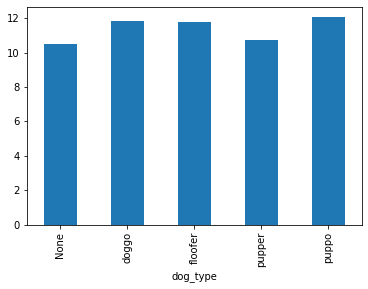

In [66]:
dog_type_feature_analysis['mean_rating'].plot(kind='bar');

##### Puppos get most likes on average

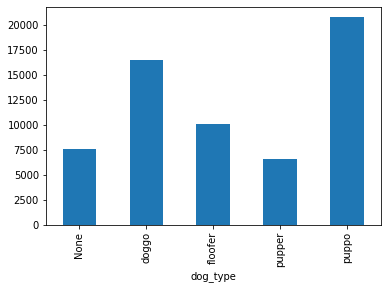

In [67]:
dog_type_feature_analysis['mean_likes'].plot(kind='bar');

##### Puppos get most retweets on average

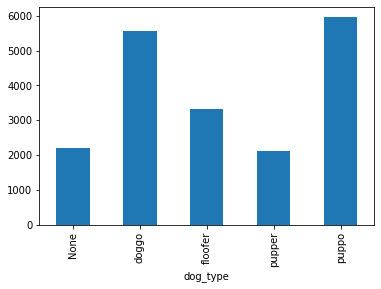

In [68]:
dog_type_feature_analysis['mean_retweets'].plot(kind='bar');

##### Looking at the ratios off likes to owner ratings, we see the same pattern

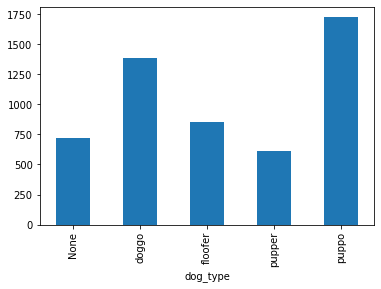

In [69]:
dog_type_feature_analysis['likes_by_ratings'].plot(kind='bar');

#### Conclusion - The community prefers Puppos

----

### Breed Analysis

#### Build a df of breed features

In [70]:
breed_feature_analysis=plot_df.groupby(['breed']).count()['tweet_id'].to_frame()
# Rename column
breed_feature_analysis=breed_feature_analysis.rename(columns={"tweet_id": "frequency"})
breed_feature_analysis['mean_rating']=plot_df.groupby(['breed']).mean()['rating_numerator']
breed_feature_analysis['mean_likes']=plot_df.groupby([ 'breed']).mean()['like_count']
breed_feature_analysis['mean_retweets']=plot_df.groupby([ 'breed']).mean()['retweet_count']
breed_feature_analysis['likes_by_ratings']=breed_feature_analysis['mean_likes']/breed_feature_analysis['mean_rating']

breed_feature_analysis

,frequency,mean_rating,mean_likes,mean_retweets,likes_by_ratings
breed,,,,,
Unknown,266,11.368421,11281.909774,3169.853383,992.390212
afghan_hound,4,11.250000,3510.250000,1462.250000,312.022222
airedale,9,10.888889,8534.555556,2032.888889,783.785714
american_staffordshire_terrier,15,11.266667,7215.533333,2334.466667,640.431953
appenzeller,2,9.000000,2977.000000,871.500000,330.777778
...,...,...,...,...,...
welsh_springer_spaniel,3,12.000000,19863.000000,5831.333333,1655.250000
west_highland_white_terrier,11,11.636364,10347.363636,2783.818182,889.226562
whippet,8,10.375000,6479.375000,2491.125000,624.518072


####  Constrain to the quartile of most commonly seen breeds
- More manageable
- large populations for the stats

In [71]:
# Create the quartile feature
breed_feature_analysis['quantile_rank'] = pd.qcut(breed_feature_analysis['frequency'], 4,
                               labels = False)

# Drop columns with value_counts less than 5
breed_feature_analysis.drop(breed_feature_analysis[breed_feature_analysis.quantile_rank < 3].index, inplace=True)

##### Owner ratings are similar, regardless of breed

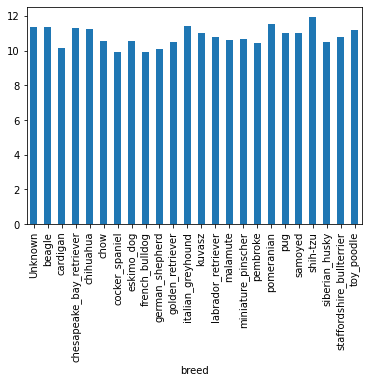

In [72]:
breed_feature_analysis['mean_rating'].plot(kind='bar');

In [73]:
##### Shih-tzus get significantly more likes

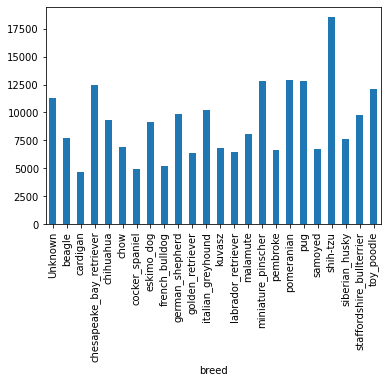

In [74]:
breed_feature_analysis['mean_likes'].plot(kind='bar');

##### Shih-tzus get significantly more retweets

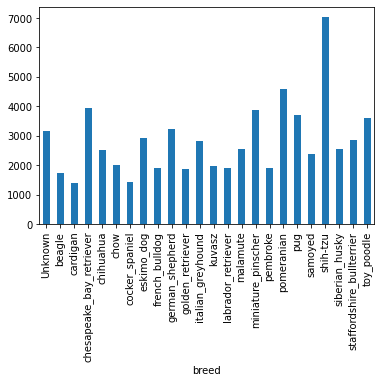

In [75]:
breed_feature_analysis['mean_retweets'].plot(kind='bar');

##### Looking at the ratios of likes to owner ratings, we see the same pattern

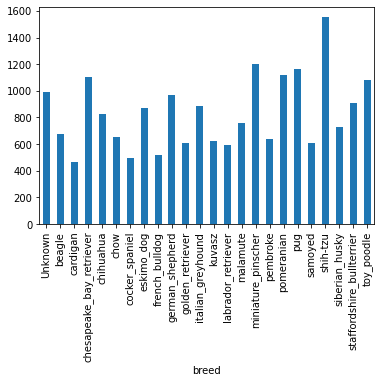

In [76]:
breed_feature_analysis['likes_by_ratings'].plot(kind='bar');

### Conclusion
The community really likes Shih-tzus, and shows a marked preference for smaller breeds generally.  Combined with the preference for Puppos found above, this suggests that small dogs are cute.

Who knew?

#### Is there a relationship between rating and timestamp 

In [77]:
plot_df['hour'] = plot_df['timestamp'].dt.hour

#['hour'] = plot_df['timestamp'].dt.hour
plot_df['corrected-hour']=plot_df['hour']-5

In [78]:


time_analysis=plot_df.groupby(['hour']).count()['tweet_id'].to_frame()

# rename column
time_analysis=time_analysis.rename(columns={"tweet_id": "frequency"})

time_analysis['mean_rating']=plot_df.groupby(['hour']).mean()['rating_numerator']
time_analysis['mean_likes']=plot_df.groupby([ 'hour']).mean()['like_count']
time_analysis['mean_retweets']=plot_df.groupby([ 'hour']).mean()['retweet_count']
time_analysis['likes_by_ratings']=time_analysis['mean_likes']/time_analysis['mean_rating']

# breed_df['rating_numerator'].plot(kind='bar')
time_analysis

,frequency,mean_rating,mean_likes,mean_retweets,likes_by_ratings
hour,,,,,
0,258,10.996124,12070.732558,3192.325581,1097.726119
1,285,10.557895,7372.171930,2191.856140,698.261549
2,219,10.200913,4394.835616,1558.703196,430.827663
3,179,9.854749,4177.005587,1329.770950,423.857143
4,98,9.632653,3091.632653,1085.132653,320.953390
5,25,9.440000,2979.520000,1240.240000,315.627119
6,4,12.000000,34162.750000,15920.500000,2846.895833
13,2,11.500000,13728.500000,3167.500000,1193.782609
14,9,10.777778,4208.333333,1256.111111,390.463918


#### Looking at the tweet frequency by hour of the day there is an obvious dip between 5 and 14 - presumably this is night-time - which makes sense if we assime that tweet times are in UTC and the user base is mainly in the USA)

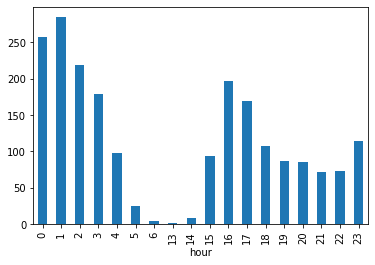

In [79]:
time_analysis['frequency'].plot(kind='bar');

In [80]:
# Create the quartile feature
time_analysis['decile_rank'] = pd.qcut(time_analysis['frequency'], 10,
                               labels = False)

time_analysis

# Drop columns with value_counts less than 2
time_analysis.drop(time_analysis[time_analysis.decile_rank < 2].index, inplace=True)

#### Assuming that the period 5- 14 is when folk are asleep it is apparent that owners like their dogs early in the morning and less and less the later it gets at night.

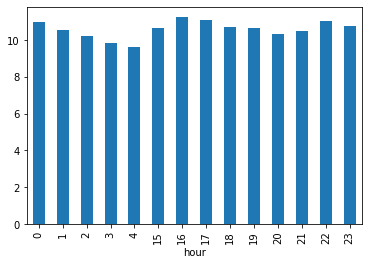

In [81]:
time_analysis['mean_rating'].plot(kind='bar');

## Report 

Create a **300-600 word written report** called **`wrangle_report.pdf`** or **`wrangle_report.html`** that briefly describes your wrangling efforts. This is to be framed as an internal document.

Create a **250-word-minimum written report** called **`act_report.pdf`** or **`act_report.html`** that communicates the insights and displays the visualization(s) produced from your wrangled data. This is to be framed as an external document, like a blog post or magazine article, for example.

Both of these documents can be created in separate Jupyter Notebooks using the Markdown functionality of Jupyter Notebooks, then downloading those notebooks as PDF files or HTML files (see [here](https://video.udacity-data.com/topher/2017/October/59f4084b_screenshot-2017-10-28-00.29.25/screenshot-2017-10-28-00.29.25.png)).